# Potato Project Phase 3
#### Thi Nguyen, 862051496
#### Sydney Pun 862053259
#### Heng Tan 862155921

## Loading the Datasets:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
FiresInBrazil = pd.read_csv('ForestFiresInBrazil.csv')
FiresInBrazil.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### Checking for Missing Values

In [3]:
for col in FiresInBrazil.columns:
    if FiresInBrazil[col].dtype == object:
        count = 0
        count = [count + 1 for x in FiresInBrazil[col] if x == '?']
        print(col + ' ' + str(sum(count)))

state 0
month 0
date 0


### Change months to numbers

In [4]:
FiresInBrazil.month = FiresInBrazil.month.replace('Janeiro', '1')
FiresInBrazil.month = FiresInBrazil.month.replace('Fevereiro', '2')
FiresInBrazil.month = FiresInBrazil.month.replace('Março', '3')
FiresInBrazil.month = FiresInBrazil.month.replace('Abril', '4')
FiresInBrazil.month = FiresInBrazil.month.replace('Maio', '5')
FiresInBrazil.month = FiresInBrazil.month.replace('Junho', '6')
FiresInBrazil.month = FiresInBrazil.month.replace('Julho', '7')
FiresInBrazil.month = FiresInBrazil.month.replace('Agosto', '8')
FiresInBrazil.month = FiresInBrazil.month.replace('Setembro', '9')
FiresInBrazil.month = FiresInBrazil.month.replace('Outubro', '10')
FiresInBrazil.month = FiresInBrazil.month.replace('Novembro', '11')
FiresInBrazil.month = FiresInBrazil.month.replace('Dezembro', '12')
FiresInBrazil.month.value_counts()

1     541
7     540
2     540
6     540
10    540
11    540
5     540
8     540
9     540
4     540
3     540
12    513
Name: month, dtype: int64

In [9]:
FiresInBrazil = FiresInBrazil.astype({"month": "int64"})

In [10]:
FiresInBrazil.dtypes

year        int64
state      object
month       int64
number    float64
date       object
dtype: object

# Setting up model

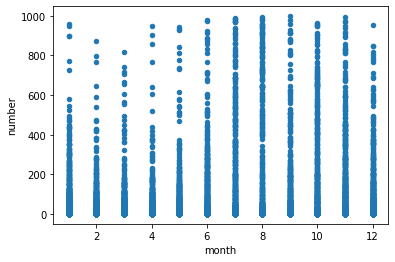

In [12]:
from sklearn.linear_model import LinearRegression

Bra_train = FiresInBrazil.loc[:].copy()
Bra_test  = FiresInBrazil.loc[:].copy()

X_train = Bra_train[["month"]]
X_test  = Bra_test[["month"]]
y_train = Bra_train["number"]

Bra_train.plot.scatter(x="month", y="number")

In [13]:
X_train.shape
X_train.describe()

,month
count,6454.000000
mean,6.476139
std,3.441522
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,12.000000


In [14]:
y_train.shape
y_train.describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

In [15]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([ 58.60699949,  58.60699949,  58.60699949, ..., 158.41232109,
       158.41232109, 158.41232109])

In [16]:
model.coef_

array([9.07321106])

In [17]:
model.intercept_

49.533788430050954

# Build model using validation dataset


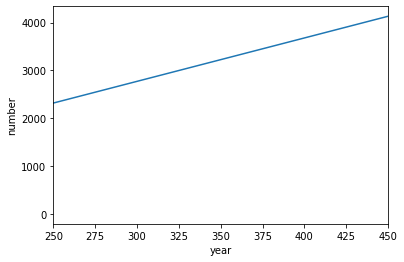

In [18]:
X_Bra = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_Bra["year"] = np.linspace(250, 450, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_Bra = pd.Series(
    model.predict(X_Bra), # y values in Series.plot.line()
    index=X_Bra["year"]    # x values in Series.plot.line()
)

# plot the data, then the model
Bra_train.plot.scatter(x="year", y="number")
y_Bra.plot.line()

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

# pipeline and fit to training set
pipeline = make_pipeline(
    StandardScaler(),
    SGDRegressor()
)
pipeline.fit(X=X_train, y=y_train)
    
scores = cross_val_score(pipeline, 
                         X=X_train,
                         y=y_train,
                         cv=5)  # cv refers to number of cross-validation cuts
scores

array([ 0.04911404, -0.04527086,  0.00883745,  0.05275297, -0.00223575])

In [23]:
Y_predict = pipeline.predict(X=X_test)
#output = pd.DataFrame(data={"id":df_test.index,"ibu":Y_predict}) # first need to create df_test 
output = pd.DataFrame(data={"id":FiresInBrazil.index,"number":Y_predict}) 

output.to_csv(path_or_buf="results.csv",index=False,quoting=3,sep=',')